Mount Google Drive

In [2]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/DS5230_Project/

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1VDNu1UgCrikOKRQws_HNNIKQJ4YbCTvu/DS5230_Project


Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.cluster import DBSCAN

Load Data

In [4]:
census_data = pd.read_csv('Code/Data/census_data.csv')

In [5]:
district_census_data = pd.read_csv('Code/Data/district_census_data.csv')

EDA

In [6]:
census_data.set_index('Year', inplace = True)
district_census_data.set_index('YEAR', inplace = True)

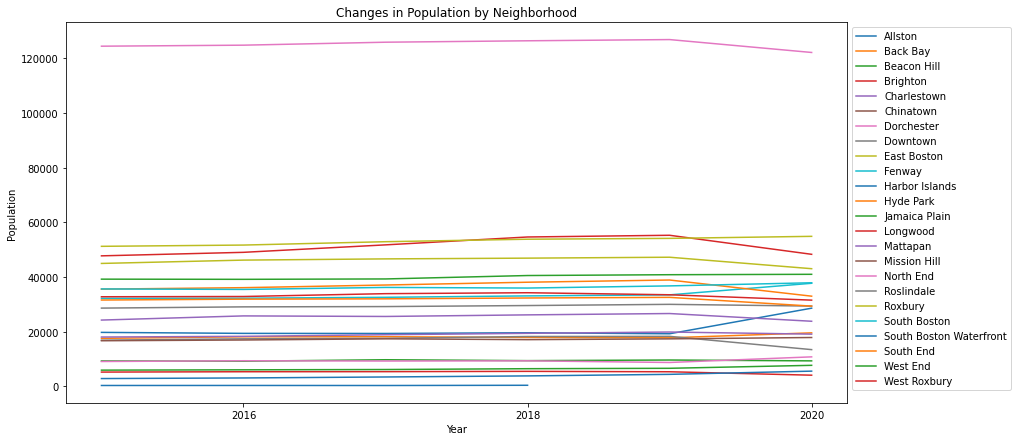

In [7]:
fig, ax = plt.subplots(figsize = (14,7))
for neighborhood, df in census_data[['Neighborhood', 'Population']].groupby('Neighborhood'):
  df['Population'].plot(ax = ax, label = neighborhood)
plt.locator_params(axis = 'x', nbins = 5)
plt.ylabel('Population')
plt.title('Changes in Population by Neighborhood')
ax.legend(bbox_to_anchor = (1, 1))
plt.show()

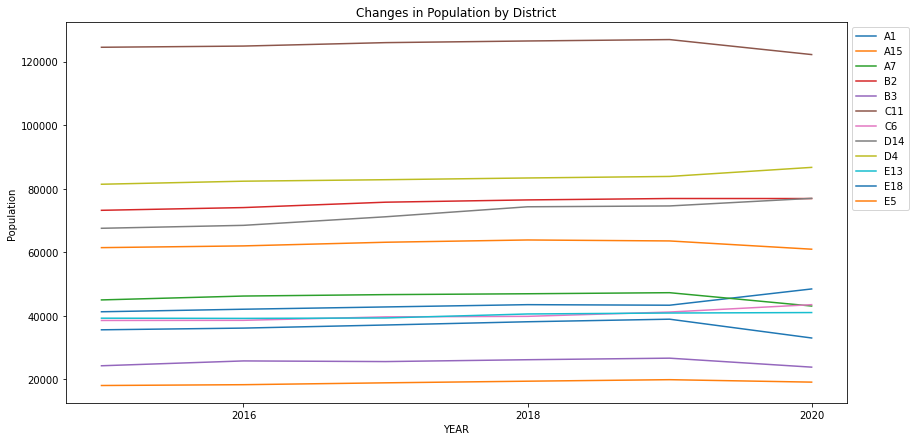

In [8]:
fig, ax = plt.subplots(figsize = (14,7))
for district, df in district_census_data[['DISTRICT', 'Population']].groupby('DISTRICT'):
  df['Population'].plot(ax = ax, label = district)
plt.locator_params(axis = 'x', nbins = 5)
plt.ylabel('Population')
plt.title('Changes in Population by District')
ax.legend(bbox_to_anchor = (1, 1))
plt.show()

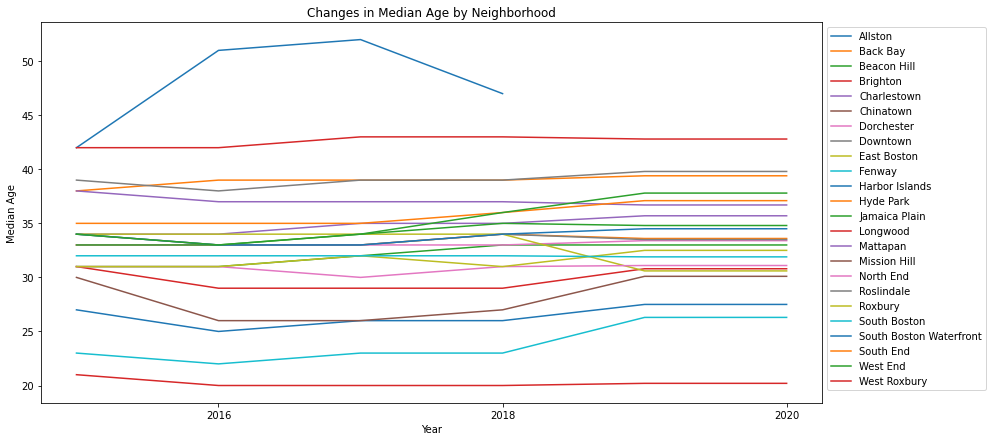

In [9]:
fig, ax = plt.subplots(figsize = (14,7))
for neighborhood, df in census_data[['Neighborhood', 'Median Age']].groupby('Neighborhood'):
  df['Median Age'].plot(ax = ax, label = neighborhood)
plt.locator_params(axis = 'x', nbins = 5)
plt.ylabel('Median Age')
plt.title('Changes in Median Age by Neighborhood')
ax.legend(bbox_to_anchor = (1, 1))
plt.show()

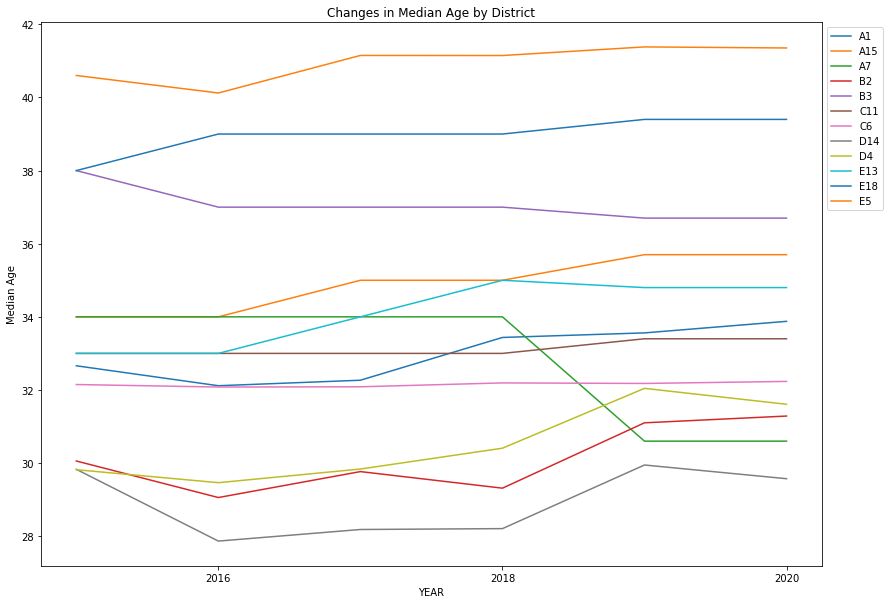

In [10]:
fig, ax = plt.subplots(figsize = (14,10))
for district, df in district_census_data[['DISTRICT', 'Median Age']].groupby('DISTRICT'):
  df['Median Age'].plot(ax = ax, label = district)
plt.locator_params(axis = 'x', nbins = 5)
plt.ylabel('Median Age')
plt.title('Changes in Median Age by District')
ax.legend(bbox_to_anchor = (1, 1))
plt.show()

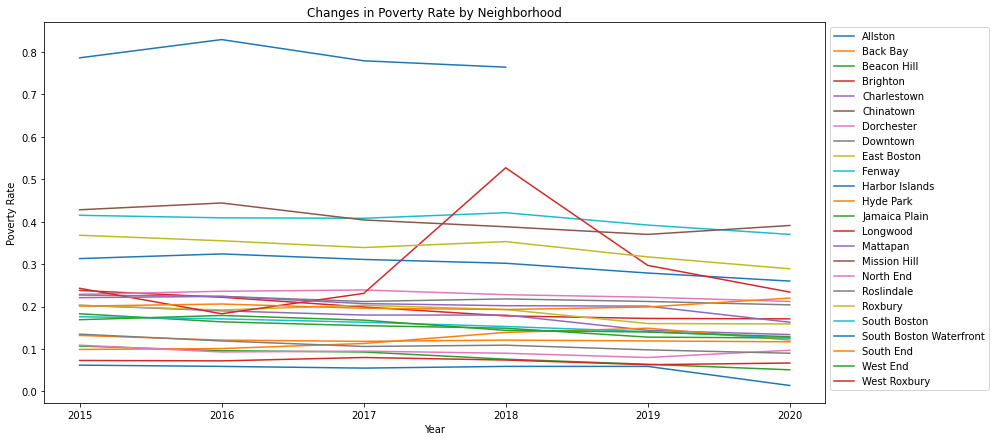

In [11]:
fig, ax = plt.subplots(figsize = (14,7))
for neighborhood, df in census_data[['Neighborhood', 'Poverty rate']].groupby('Neighborhood'):
  df['Poverty rate'].plot(ax = ax, label = neighborhood)
plt.locator_params(axis = 'x', nbins = 6)
plt.ylabel('Poverty Rate')
plt.title('Changes in Poverty Rate by Neighborhood')
ax.legend(bbox_to_anchor = (1, 1))
plt.show()

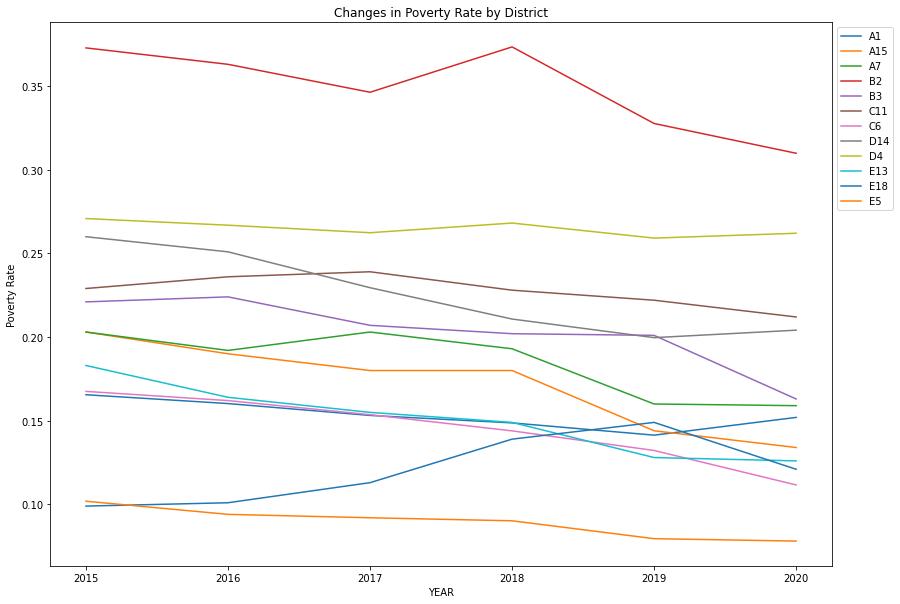

In [12]:
fig, ax = plt.subplots(figsize = (14,10))
for district, df in district_census_data[['DISTRICT', 'Poverty rate']].groupby('DISTRICT'):
  df['Poverty rate'].plot(ax = ax, label = district)
plt.locator_params(axis = 'x', nbins = 6)
plt.ylabel('Poverty Rate')
plt.title('Changes in Poverty Rate by District')
ax.legend(bbox_to_anchor = (1, 1))
plt.show()

In [13]:
neighborhood_list = np.asarray(census_data['Neighborhood'].unique())
district_list = np.asarray(district_census_data['DISTRICT'].unique())

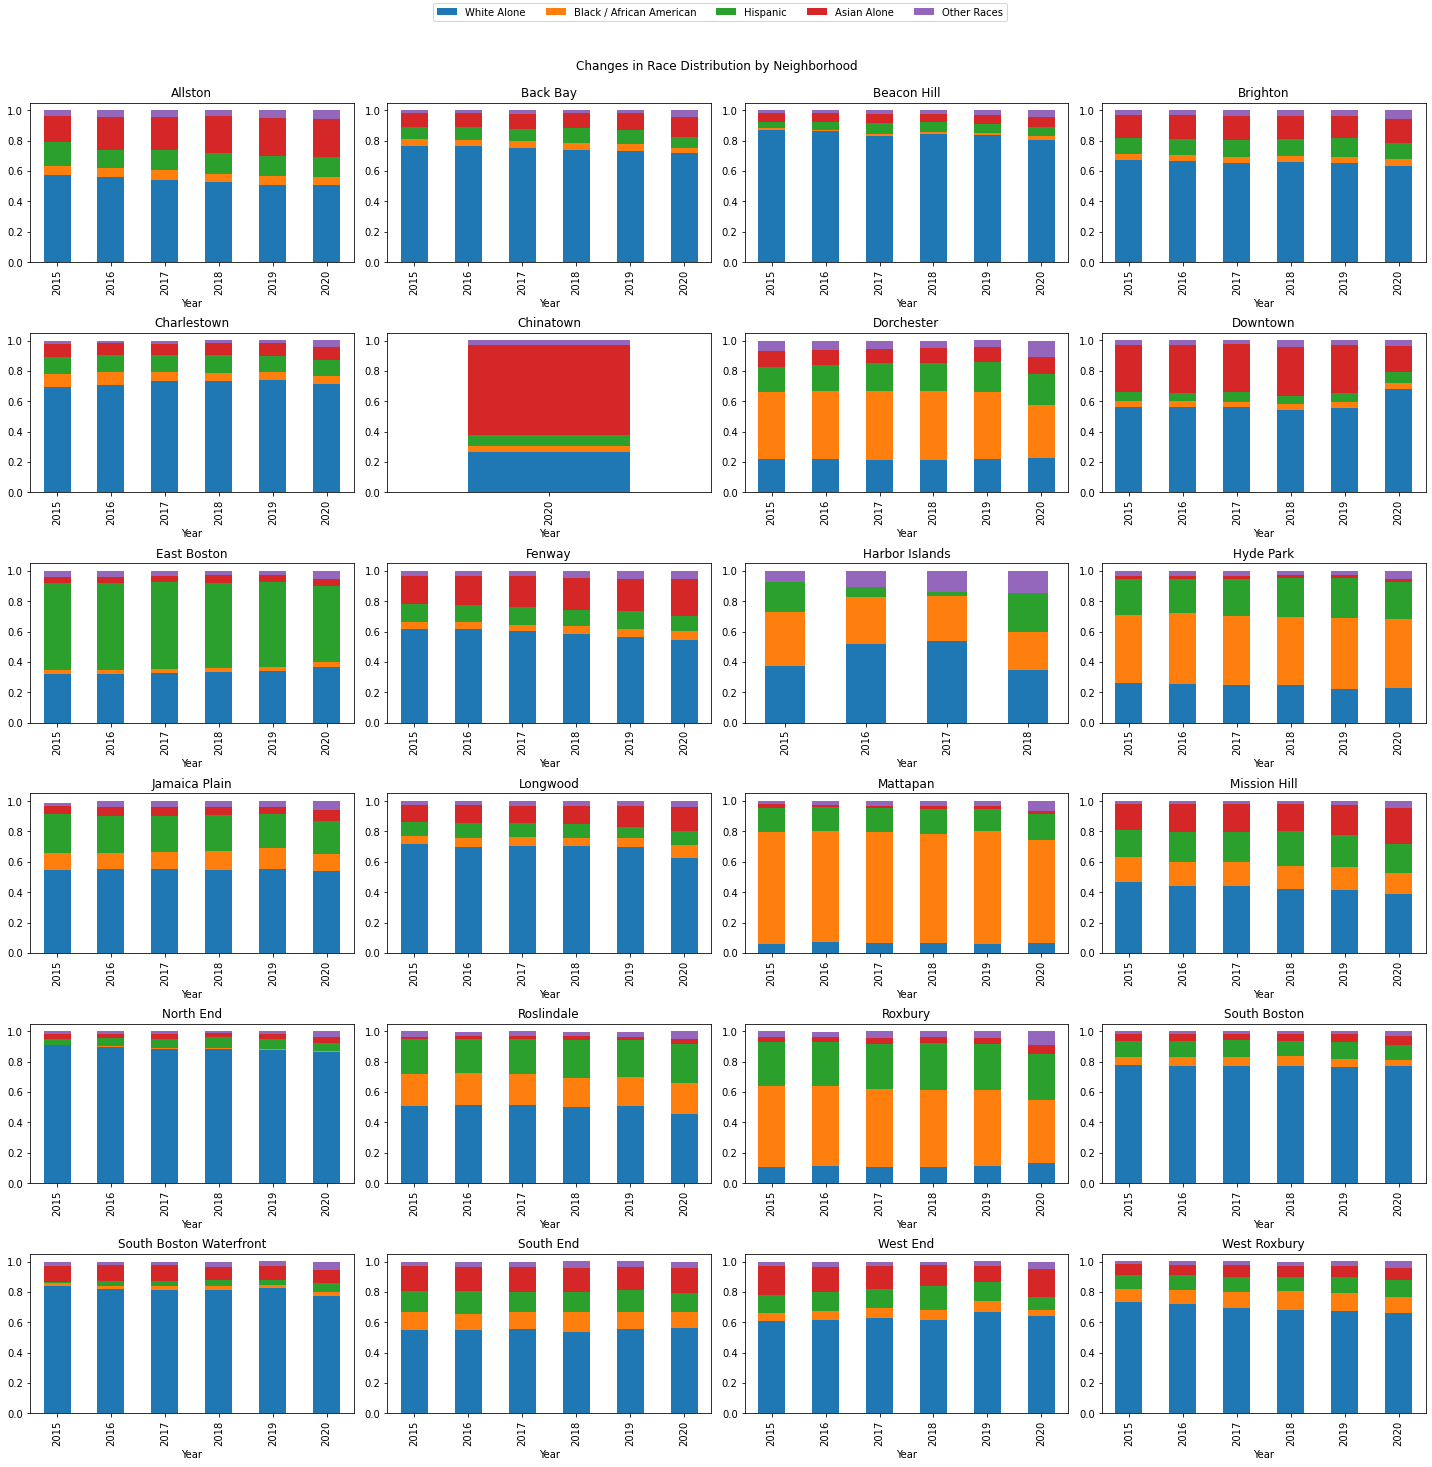

In [14]:
fig, ax = plt.subplots(6, 4, figsize = (20, 20))
for neighborhood, ax in zip(neighborhood_list, ax.ravel()):
  df = census_data[census_data['Neighborhood'] == neighborhood][['White Alone', 'Black / African American', 'Hispanic', 'Asian Alone', 'Other Races']]
  df.plot(ax = ax, kind = 'bar', stacked = True)
  ax.set_title(neighborhood)
  ax.get_legend().remove()
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol = 5, loc = 'upper center', bbox_to_anchor = (0.5,1.02))
fig.tight_layout()
fig.subplots_adjust(top = 0.95)
fig.suptitle('Changes in Race Distribution by Neighborhood')
plt.show()

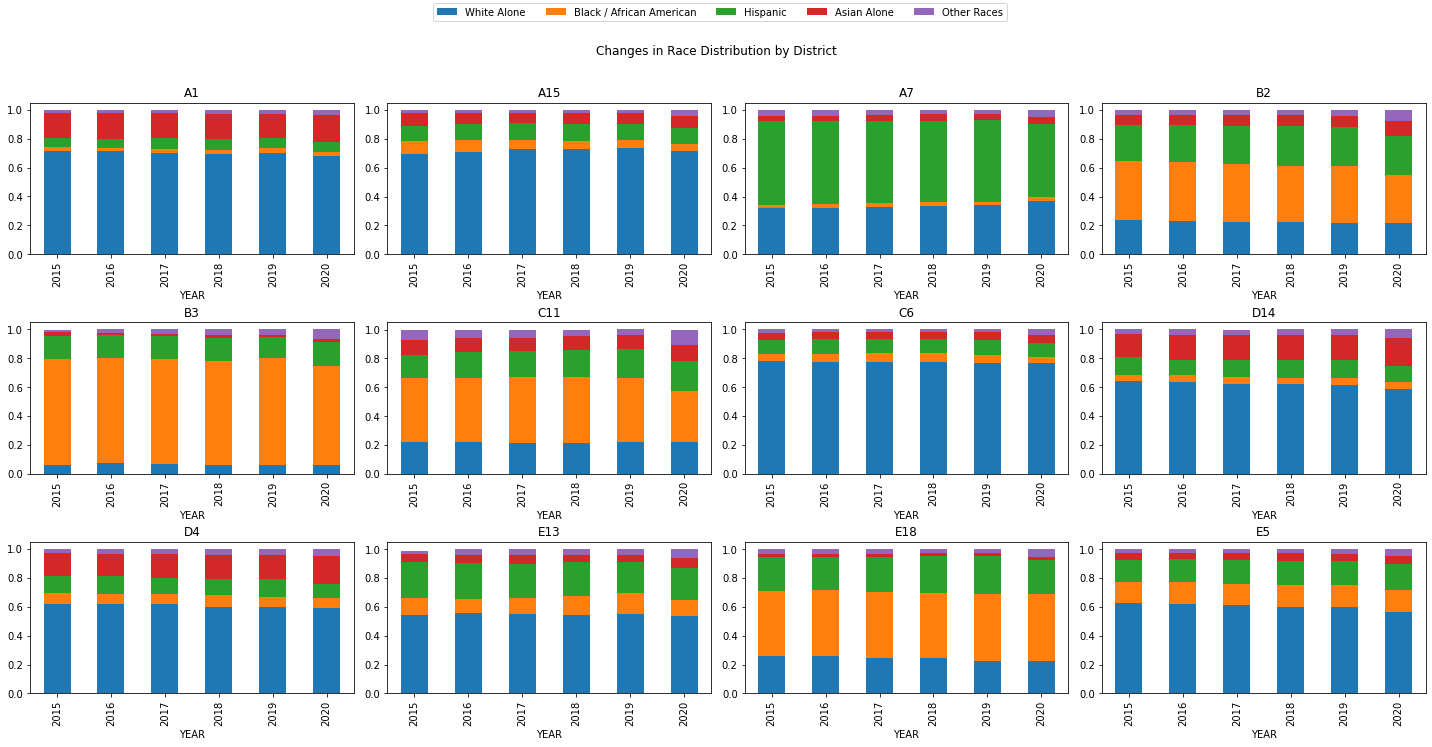

In [15]:
fig, ax = plt.subplots(3, 4, figsize = (20, 10))
for district, ax in zip(district_list, ax.ravel()):
  df = district_census_data[district_census_data['DISTRICT'] == district][['White Alone', 'Black / African American', 'Hispanic', 'Asian Alone', 'Other Races']]
  df.plot(ax = ax, kind = 'bar', stacked = True)
  ax.set_title(district)
  ax.get_legend().remove()
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol = 5, loc = 'upper center', bbox_to_anchor = (0.5,1.04))
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle('Changes in Race Distribution by District')
plt.show()

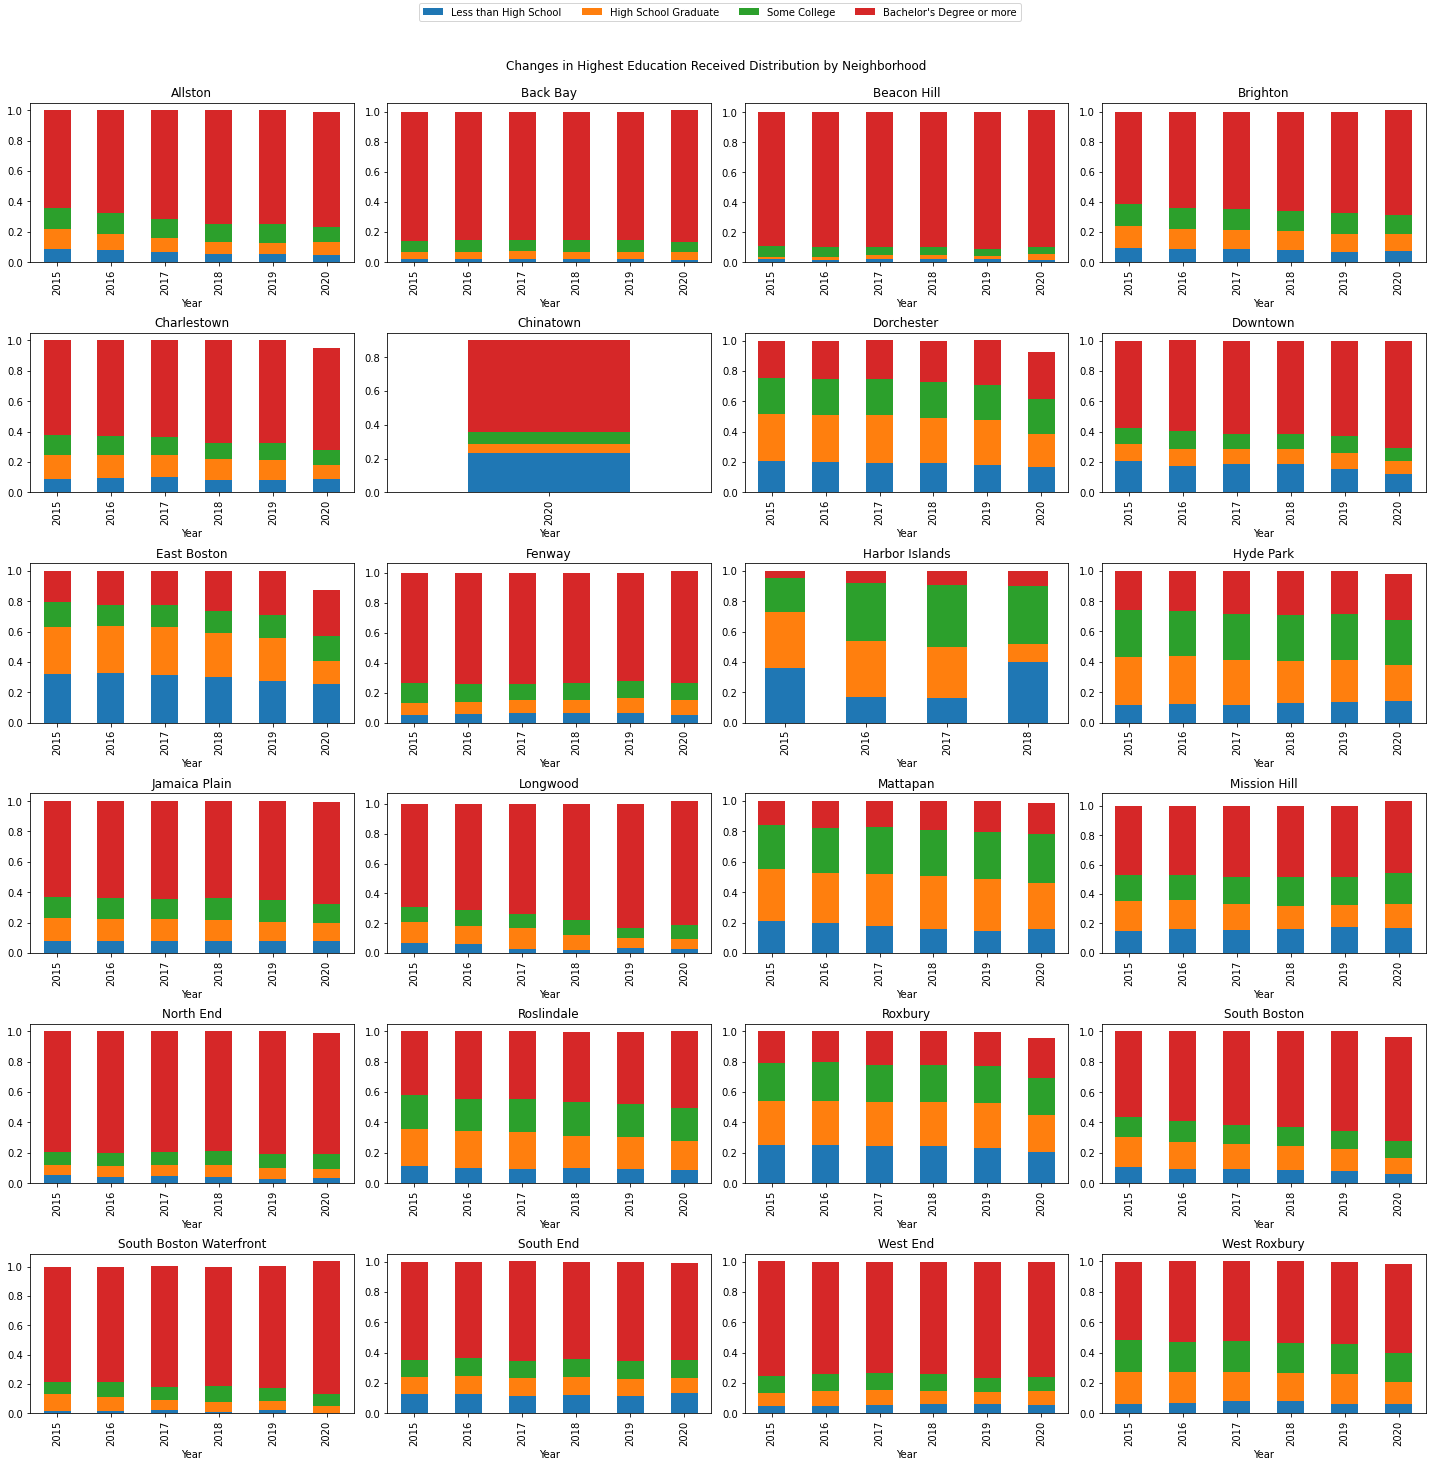

In [16]:
fig, ax = plt.subplots(6, 4, figsize = (20, 20))
for neighborhood, ax in zip(neighborhood_list, ax.ravel()):
  df = census_data[census_data['Neighborhood'] == neighborhood][['Less than High School', 'High School Graduate', 'Some College', "Bachelor's Degree or more"]]
  df.plot(ax = ax, kind = 'bar', stacked = True)
  ax.set_title(neighborhood)
  ax.get_legend().remove()
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol = 4, loc = 'upper center', bbox_to_anchor = (0.5,1.02))
fig.tight_layout()
fig.subplots_adjust(top = 0.95)
fig.suptitle('Changes in Highest Education Received Distribution by Neighborhood')
plt.show()

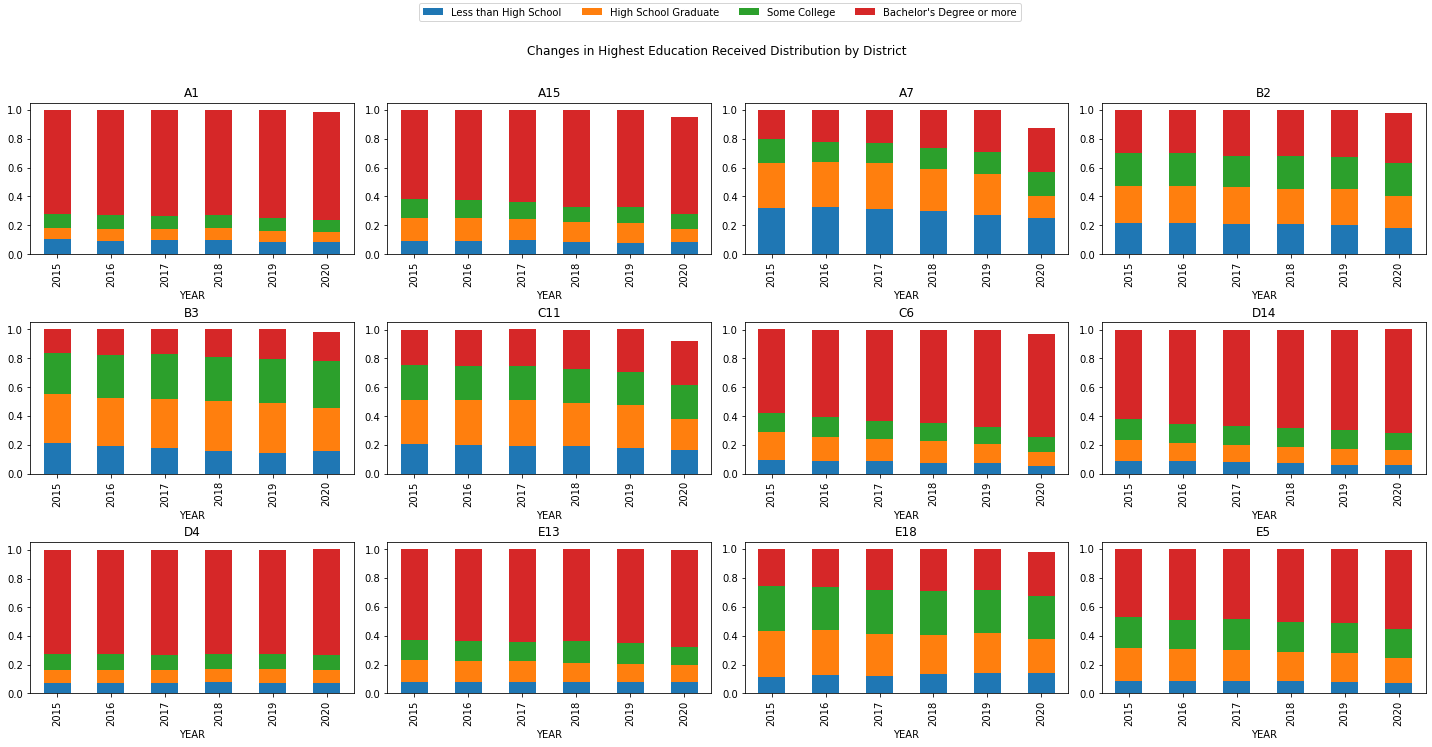

In [17]:
fig, ax = plt.subplots(3, 4, figsize = (20, 10))
for district, ax in zip(district_list, ax.ravel()):
  df = district_census_data[district_census_data['DISTRICT'] == district][['Less than High School', 'High School Graduate', 'Some College', "Bachelor's Degree or more"]]
  df.plot(ax = ax, kind = 'bar', stacked = True)
  ax.set_title(district)
  ax.get_legend().remove()
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol = 4, loc = 'upper center', bbox_to_anchor = (0.5,1.04))
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle('Changes in Highest Education Received Distribution by District')
plt.show()